----------
**Emplyee Attrition Analysis and Prediction**
=====================================

**May 2024**

----------

### Data Preprocessining 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 

import warnings
warnings.filterwarnings('ignore')

#### Load the dataset

In [2]:
df = pd.read_csv(r"C:\Users\hp.MUKESH-LF4B6N6\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")

#### head of the dataset

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### Tail of the dataset

In [6]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


#### Coulmns of the dataset

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Shape of the dataset

In [8]:
df.shape

(1470, 35)

#### Datatypes of the dataset

In [9]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### Info of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Statistical summary of the dataset

In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Check the duplicates

In [12]:
print(df.duplicated().value_counts())
df.drop_duplicates(inplace= True)
print(len(df))

False    1470
Name: count, dtype: int64
1470


#### Check the null value in dataset

In [13]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

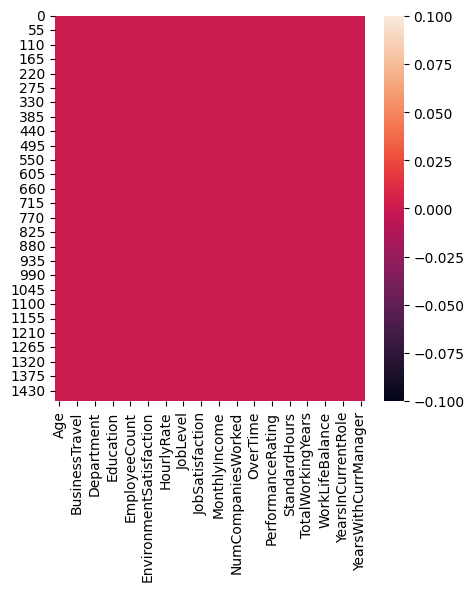

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

In [15]:
df.isnull().sum()/df.shape[0]*100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

#### Target varible

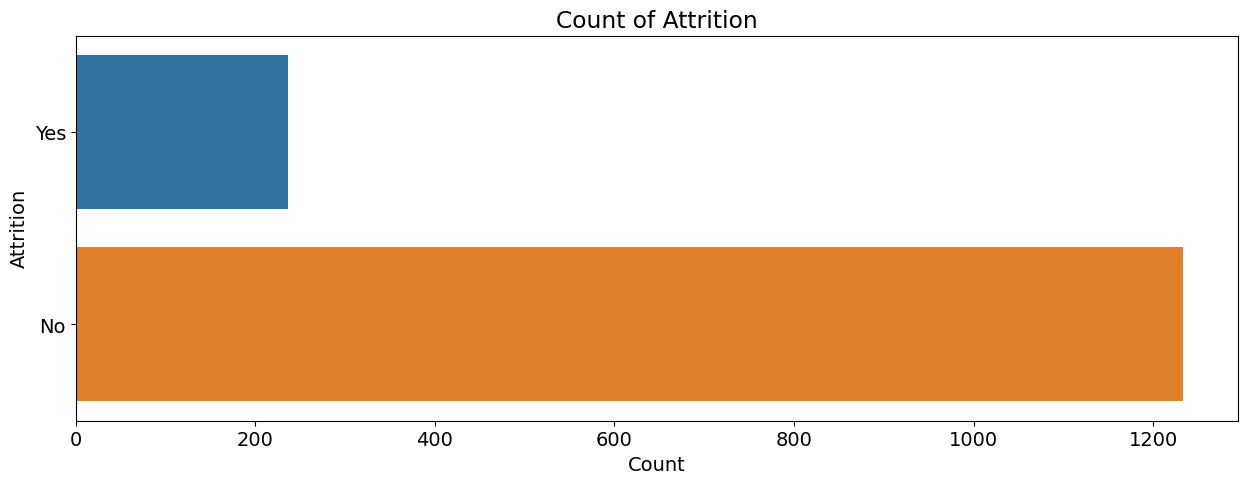

In [16]:
plt.figure(figsize=(15, 5))
plt.rc("font", size=14)
sns.countplot(y='Attrition', data=df)
plt.title('Count of Attrition')
plt.xlabel('Count')
plt.ylabel('Attrition')
plt.show()

In [17]:
# Explore categorical variables
print(df['Department'].value_counts())

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


#### check the categorivcal and numerical columns

In [18]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Numerical Variables:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## EDA(Exploratory Data Analysis)

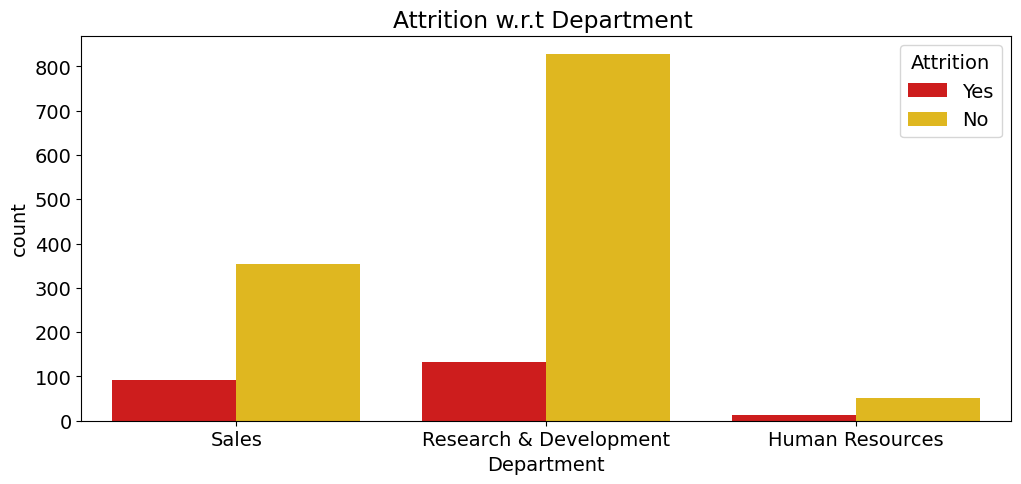

In [19]:
# Department wrt Attrition

plt.figure(figsize=(12,5))
sns.countplot(x = 'Department', hue='Attrition', data = df, palette='hot')
plt.title("Attrition w.r.t Department ")
plt.show()

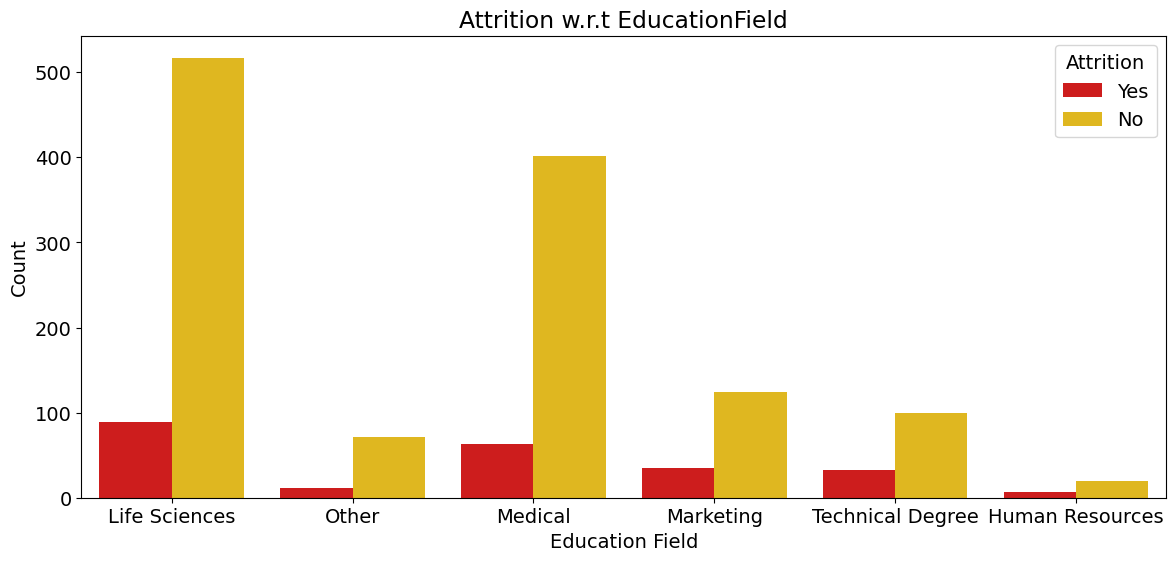

In [20]:
# Department wrt. Attrition
plt.figure(figsize=(14, 6))
sns.countplot(x='EducationField', hue='Attrition', data=df, palette='hot')
plt.title("Attrition w.r.t EducationField")
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.show()

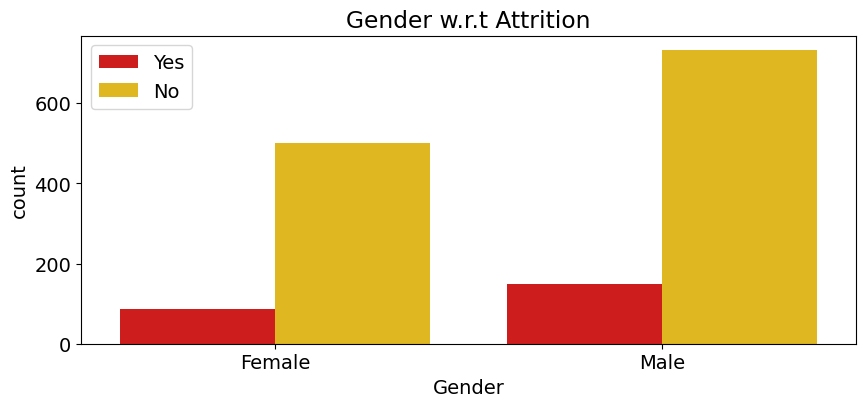

In [21]:
# Most Male and Female are attriate

plt.figure(figsize=(10,4))
sns.countplot(x='Gender', hue='Attrition', data= df, palette='hot')
plt.title("Gender w.r.t Attrition")
plt.legend(loc= 'best')
plt.show() 

<Figure size 1000x500 with 0 Axes>

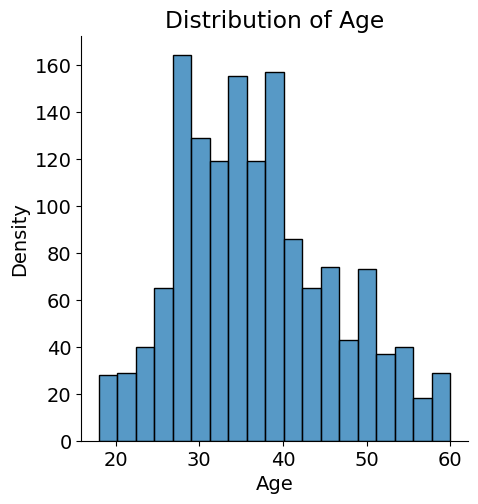

In [22]:
plt.figure(figsize=(10, 5))
sns.displot(df['Age'])  # Remove the 'hist' argument
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Distribution of Age")
plt.show()

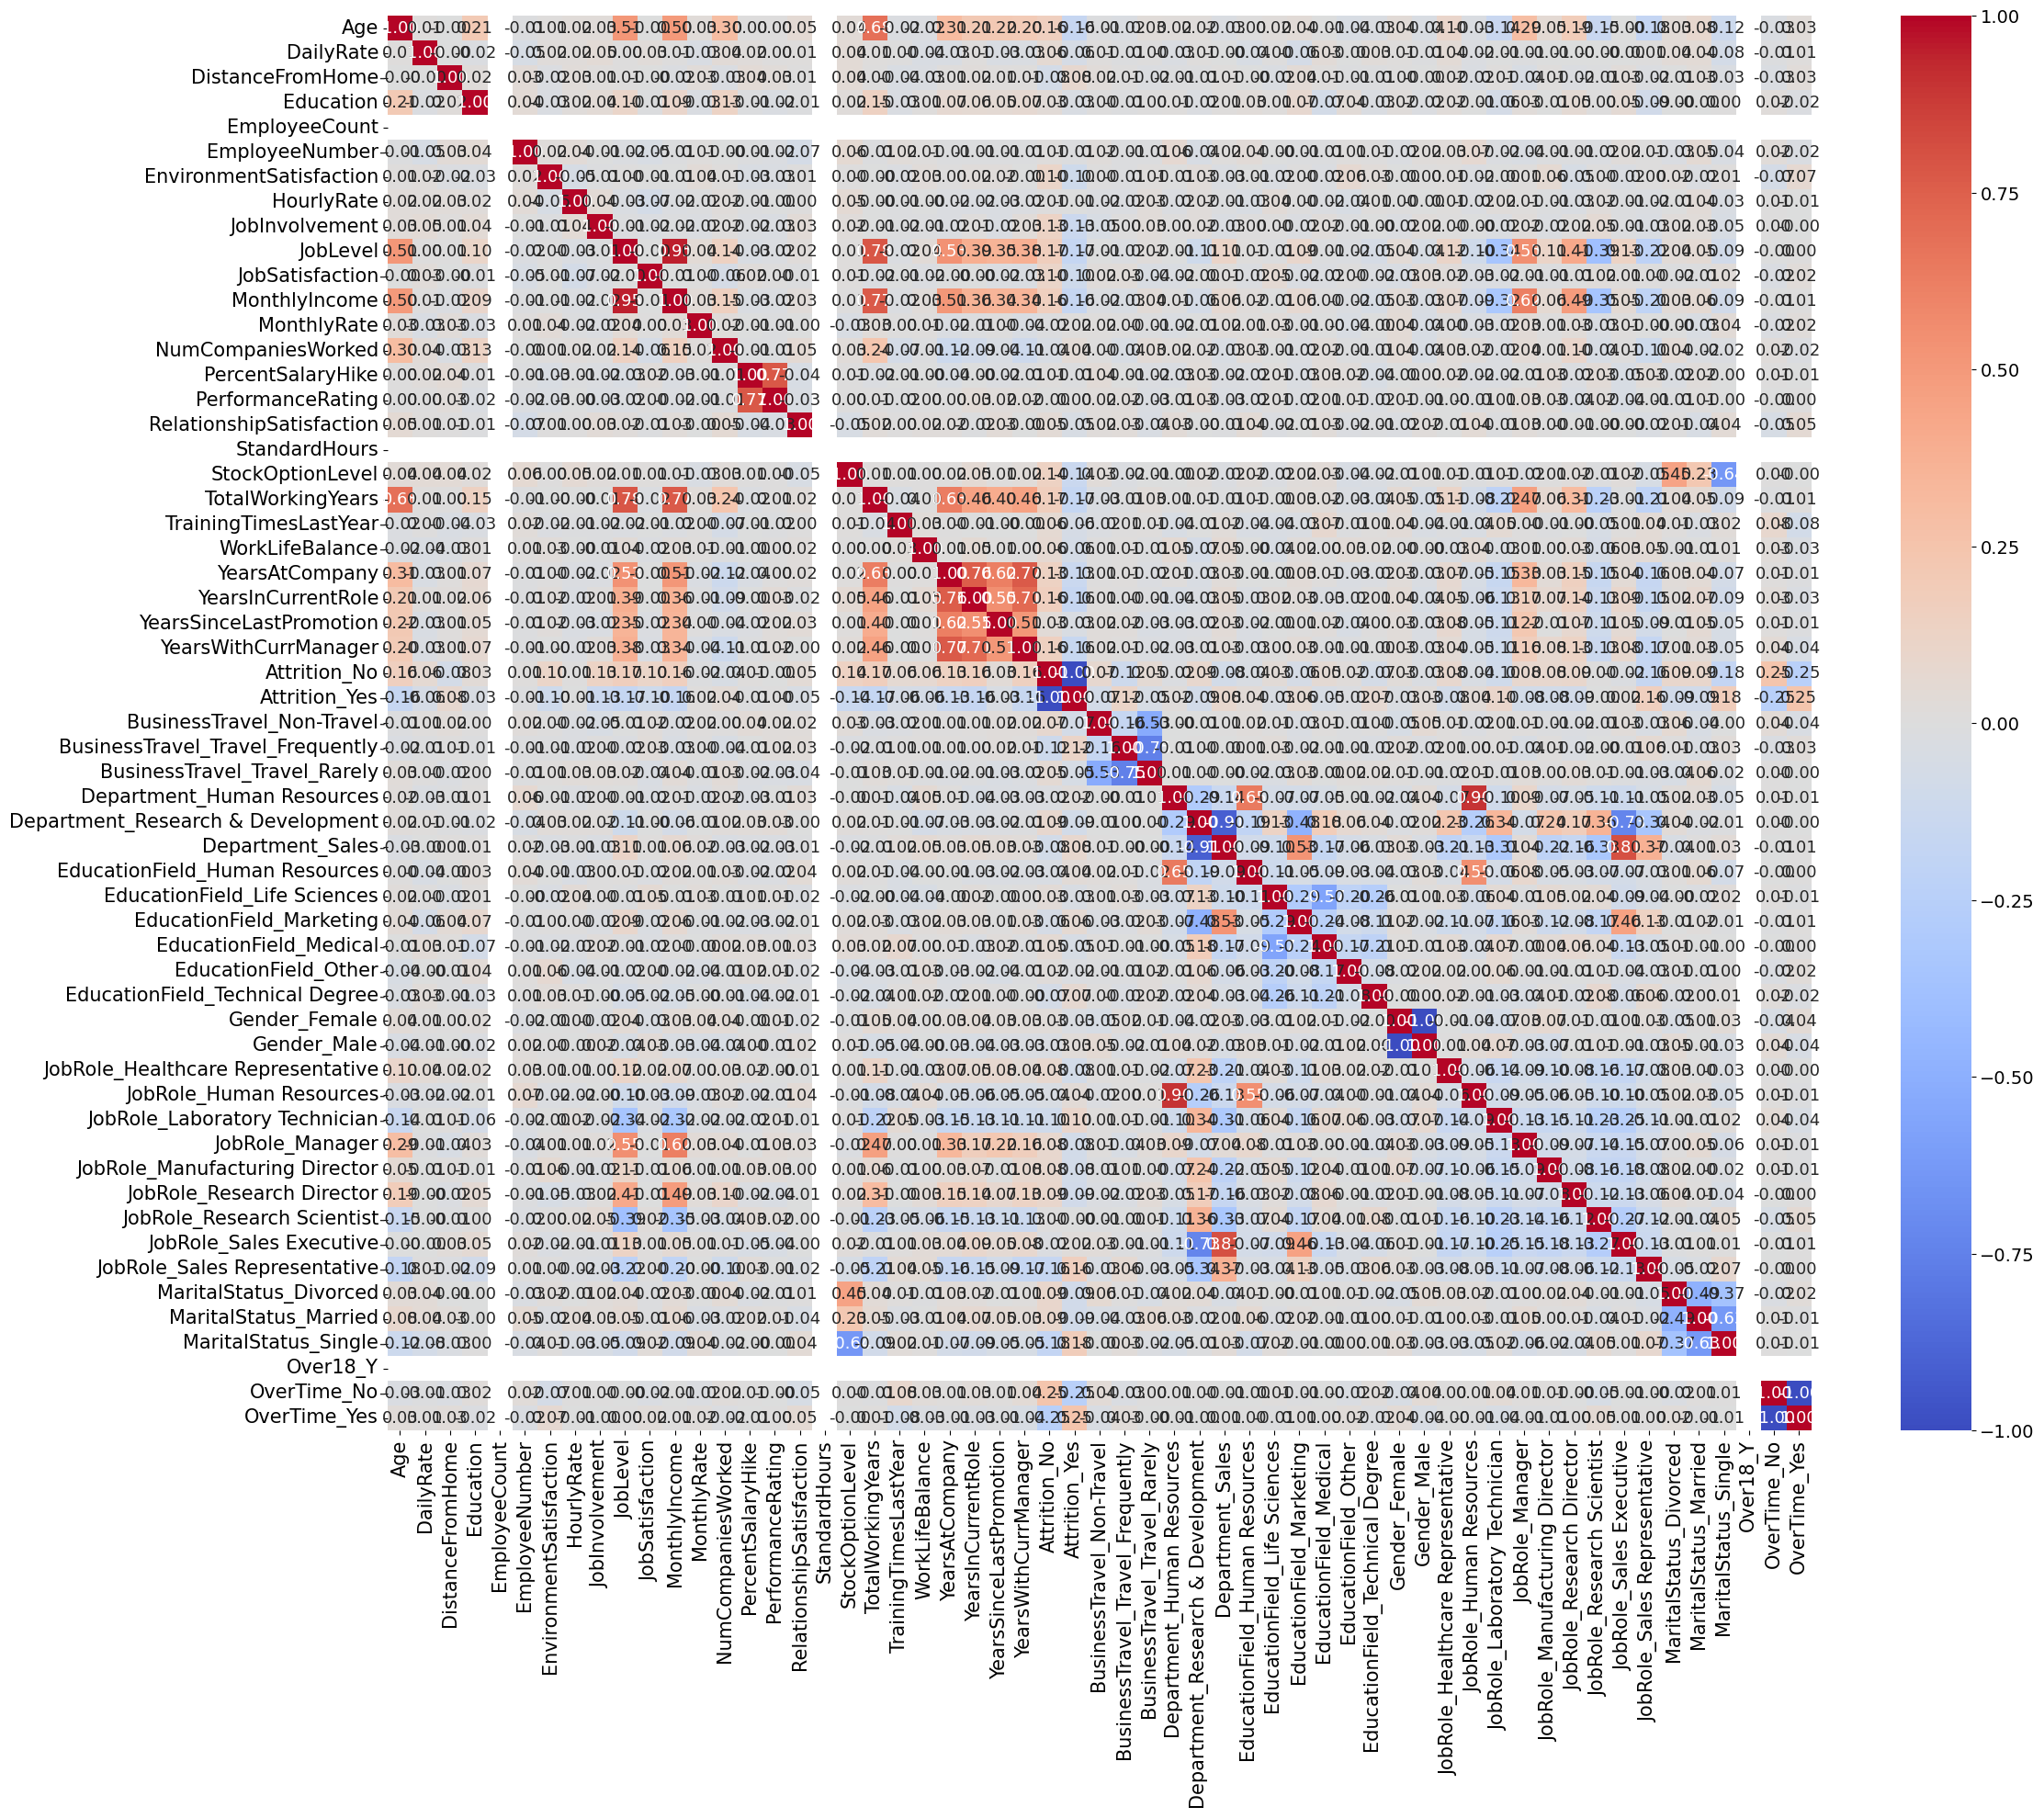

In [23]:
df_encoded = pd.get_dummies(df)
plt.figure(figsize=(25, 20))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 13})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [24]:
ordinal_features = ['Education',  'EnvironmentSatisfaction','JobInvolvement', 'JobSatisfaction','PerformanceRating','RelationshipSatisfaction',  'WorkLifeBalance']
df[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


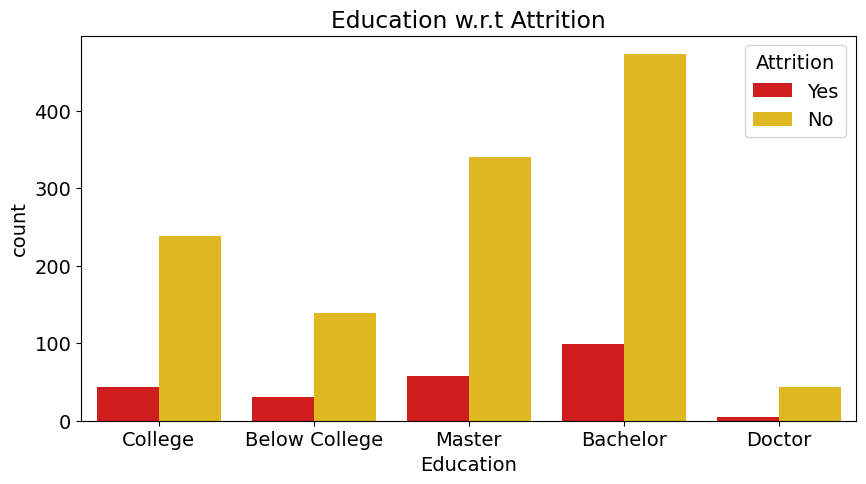

In [25]:
edu_map  = {1:'Below College', 2:'College', 3:'Bachelor', 4:'Master', 5:'Doctor'}
plt.figure(figsize=(10,5))
sns.countplot(x= df['Education'].map(edu_map), hue='Attrition', data= df, palette='hot')
plt.title("Education w.r.t Attrition")
plt.show()

##### OBSERVATIONS___
##### Employees from  Bachelor are more, then from masters Background. Attrition wrt to bachelor can be seem more because they have more and more explection from company and it will be interesting to see the reason behind this in this dataset

## Label Encoding

##### In the machine Learning , we usually deal with datasets that contain multiple labels in one or more then on columns. these labels can be in the from of word or numbers. To make the data understable or in humen readable  form , the trainiong data often labelled in words...

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
# Encode Categorical columns which are ordinal use lableencoding
# Apply Label encoder to df_categorical

from sklearn.preprocessing import LabelEncoder

#Impute missing values with the mode for each column44

df.fillna(df.mode().iloc[0], inplace=True)

#Define the categorical columns to be encoded
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

# LabelEncoders for each categorical column
label_encoders = {}

# Encode categorical columns using LabelEncoder
for column in categorical_cols:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [28]:
# Look at the final datast
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


## Machine learning :

In [29]:
x =  df.drop(['Attrition', 'Over18'], axis=1) # Input Features
y = df['Attrition'].values # Output

#### I am going to use Over sampling,                                I will not use under sampling to avoid data loss

In [30]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
rus  =  RandomOverSampler(random_state=42)
x_over, y_over = rus.fit_resample(x,y)
print(Counter(y_over))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


#### Split the data into train and test

In [32]:
x_train , x_test, y_train, y_test = train_test_split(x_over,y_over, test_size=0.2, random_state=42)

In [33]:
# check sampled data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1972, 33)
(1972,)
(494, 33)
(494,)


In [34]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [35]:
Models = {
    "-----------------Logistic Regression-----------------" : LogisticRegression(),
    "-----------------Decision Tree-------------------": DecisionTreeClassifier(),
    "-----------------Random Forest-------------------": RandomForestClassifier(),
    "-----------------Gradient Boosting---------------": GradientBoostingClassifier(),
    "--------------------KNN----------------------------": KNeighborsClassifier(),
    "---------------------AdaBoost----------------------": AdaBoostClassifier(),
    "--------------------XGBoost--------------------------": xgb.XGBClassifier()
}


for model_name, model in Models.items():
    model.fit(x_train, y_train)  # Train the model
    
    # Make Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Testing set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(model_name)

    print('Model performance for training set')
    print()
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))
    print("-----------------------------------------------")
    print('Model performance for testing set')
    print()
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))
    print('='*35)
    print('\n')


-----------------Logistic Regression-----------------
Model performance for training set

- Accuracy: 0.6410
- F1 score: 0.6400
- Precision: 0.6288
- Recall: 0.6936
- Roc Auc Score: 0.6408
-----------------------------------------------
Model performance for testing set

- Accuracy: 0.6417
- F1 score: 0.6409
- Precision: 0.6236
- Recall: 0.6926
- Roc Auc Score: 0.6423


-----------------Decision Tree-------------------
Model performance for training set

- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------------------
Model performance for testing set

- Accuracy: 0.9109
- F1 score: 0.9105
- Precision: 0.8546
- Recall: 0.9877
- Roc Auc Score: 0.9119


-----------------Random Forest-------------------
Model performance for training set

- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
-----------------------------------------------
Model performance for tes

####  Fine-tune hyperparameters

In [36]:
from sklearn.model_selection import GridSearchCV

# hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [38]:
# The classifier (assuming RandomForestClassifier)

rf_classifier = RandomForestClassifier()

# Perform grid search

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')



In [39]:
# Fit grid search to the training data

grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [40]:
# Best hyperparameters

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Interpretation and Insights:

In [44]:
# Assuming you have a trained model named 'model'
feature_importance = model.feature_importances_

# Create a DataFrame to store feature importance along with feature names
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


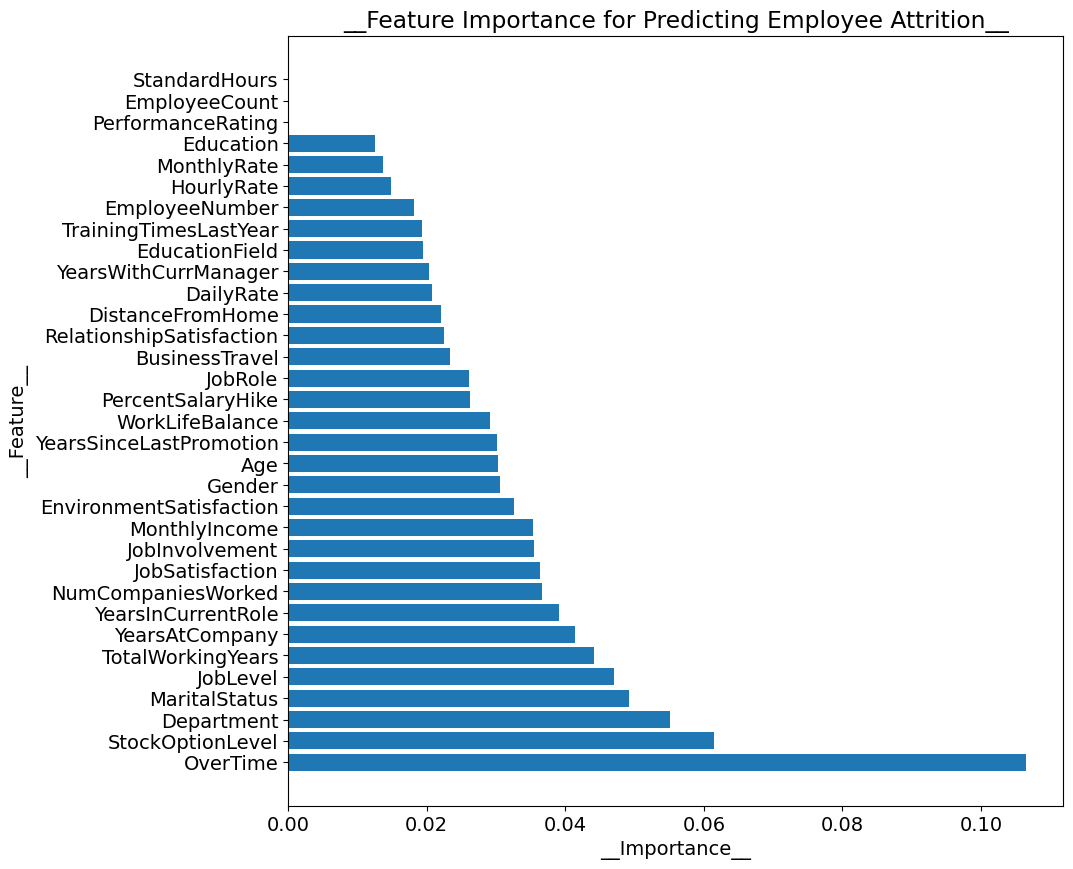

In [45]:
# Plot feature importance

plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('__Importance__')
plt.ylabel('__Feature__')
plt.title('__Feature Importance for Predicting Employee Attrition__')
plt.show()

### Find the Report Of all processes of  the dataset 

In [ ]:
print("----------------Report: Employee Attrition Analysis and Prediction-----------------")
print()
print("1. Data Preprocessing:")
print("- Handle missing values: [Method used]")
print("- Encode categorical variables: [Method used]")
print("- Scale numerical features: [Method used]")
print()
print("2. Model Training and Evaluation:")
print()
print("------------ Logistic Regression---------------:")
print("  - Accuracy:", lr_accuracy)
print("  - Precision:", lr_precision)
print("  - Recall:", lr_recall)
print("  - F1-score:", lr_f1)
print("  - ROC-AUC:", lr_roc_auc)
print()
print("------------ Decision Tree-------------:")
print("  - Accuracy:", dt_accuracy)
print("  - Precision:", dt_precision)
print("  - Recall:", dt_recall)
print("  - F1-score:", dt_f1)
print("  - ROC-AUC:", dt_roc_auc)
print()
print("------------- Random Forest-------------------:")
print("  - Accuracy:", rf_accuracy)
print("  - Precision:", rf_precision)
print("  - Recall:", rf_recall)
print("  - F1-score:", rf_f1)
print("  - ROC-AUC:", rf_roc_auc)
print()
# Gradient Boosting
print("4. Gradient Boosting:")
print("   - Accuracy:", gb_accuracy)
print("   - Precision:", gb_precision)
print("   - Recall:", gb_recall)
print("   - F1-score:", gb_f1)
print("   - ROC-AUC:", gb_roc_auc)
print()
print("3. Hyperparameter Tuning:")
print("Best Hyperparameters for Random Forest:", best_params)
print()
print("4. Feature Importance Analysis:")
print("[Summary of feature importance analysis]")
print()

----------------Report: Employee Attrition Analysis and Prediction-----------------

1. Data Preprocessing:
- Handle missing values: [Method used]
- Encode categorical variables: [Method used]
- Scale numerical features: [Method used]

2. Model Training and Evaluation:

------------ Logistic Regression---------------:
  - Accuracy: 0.6417004048582996
  - Precision: 0.6236162361623616
  - Recall: 0.6926229508196722
  - F1-score: 0.6563106796116505
  - ROC-AUC: 0.6423114754098361

------------ Decision Tree-------------:
  - Accuracy: 0.9048582995951417
  - Precision: 0.8505338078291815
  - Recall: 0.9795081967213115
  - F1-score: 0.9104761904761904
  - ROC-AUC: 0.9057540983606558

------------- Random Forest-------------------:
  - Accuracy: 0.9615384615384616
  - Precision: 0.9554655870445344
  - Recall: 0.9672131147540983
  - F1-score: 0.9613034623217923
  - ROC-AUC: 0.9616065573770491

4. Gradient Boosting:
   - Accuracy: 0.8623481781376519
   - Precision: 0.8548387096774194
   - Rec